<a href="https://colab.research.google.com/github/argennof/PDI_2022/blob/main/PDI_Toma_de_notas_clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import imageio #abrir imagenes

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#queremos computar el valor V apartir de una imagen RGB (RGB -> HCV)
def extraer_v(img_rgb):
  #separamos cada canal de la imagen img_rgb
  r= img_rgb[:,:,0] #todas las filas, todas las columnas, del canal rojo 
  g= img_rgb[:,:,1] 
  b= img_rgb[:,:,2] 

  v=np.maximum(np.maximum(r, g),b)
  return v


In [ ]:
img_rgb= imageio.imread('imageio:astronaut.png')/255 #levantamos una imagen de la libreria imageio y la normalizamos
v=extraer_v(img_rgb)
print(img_rgb.shape)
print(v.shape, '.Esto es, una imagen de un solo canal se la asocia a una escala de grises') 
print(v.min())
print(v.max())

(512, 512, 3)
(512, 512) .Esto es, una imagen de un solo canal se la asocia a una escala de grises
0.0
1.0


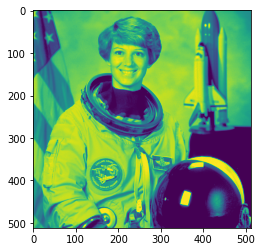

In [ ]:
plt.imshow(v)
#Dibujamos en un solo canal, matplotlib asume que es de pseudocolor (le asigna un mapa de color o tabla de color, que esta por defecto)
#

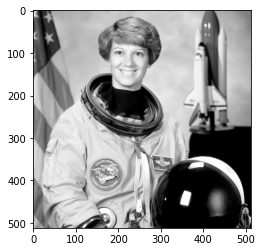

In [ ]:
plt.imshow(v, 'gray')
#esta es la imagen que me sirve en un solo canal

Histograma de luminancia

262144 pixeles en total


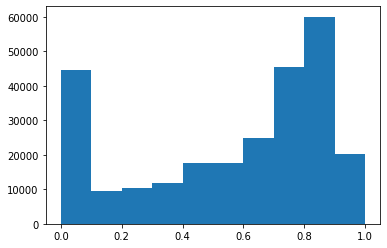

In [ ]:
plt.hist(v.flatten(), range=(0,1)) #v es dimensional
#plt.hist(v[:,:])
#numero grande de pixeles oscy¿uros: cuello del traje, casco, mesa (primera columna)
#todos los pixeles claros estan en la cola del histograma
#hay 45 mil pixeles aproximadamente de pixeles oscuros
#entre 0 y 0.1 tengo 45 mil pixeles
#no tengo informacion de localidad de los pixeles
#En cuanto al contraste o valores de la imagen: el rango esta totalmente cubierto
print(512*512, 'pixeles en total')

(array([66113., 18063., 17887., 15360., 22307., 28556., 35607., 35532.,
        17071.,  5648.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

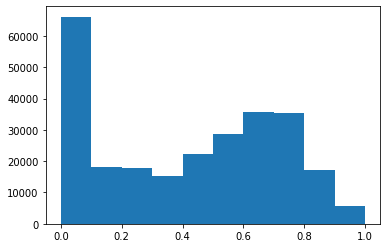

In [ ]:
v_1=v*v

plt.hist((v_1).flatten(), range=(0,1)) #v es dimensional


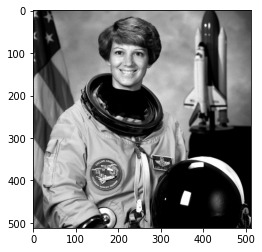

In [ ]:
plt.imshow(v_1,'gray')

(array([31977.,  6059.,  5344.,  6546.,  9262., 12223., 20376., 27332.,
        69700., 73325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

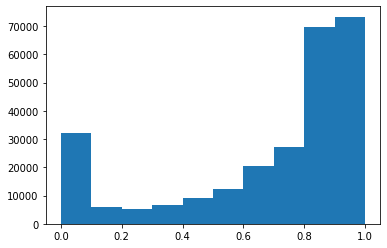

In [ ]:
plt.hist((np.sqrt(v)).flatten(), range=(0,1)) #v es dimensional

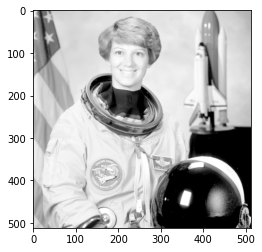

In [ ]:
plt.imshow(np.sqrt(v),'gray')

(512, 512, 3)
(400, 600, 3)


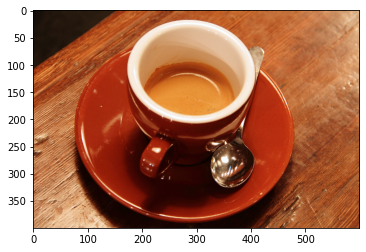

In [ ]:
img_1= imageio.imread('imageio:astronaut.png')/255
img_2_2= imageio.imread('imageio:coffee.png')/255
plt.imshow(img_2_2)

print(img_1.shape)
print(img_2_2.shape)

In [ ]:
print(img_1.shape)
print(img_2_2.shape)
#tamaños distintos

(512, 512, 3)
(400, 600, 3)


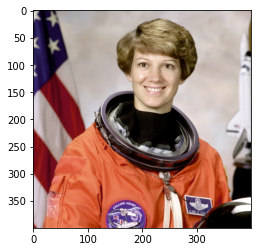

In [ ]:
#cropeo img_1 a 400 x 400
img_1=img_1[0:400, 0:400,:]
plt.imshow(img_1)

In [ ]:
img_1.shape

(400, 400, 3)

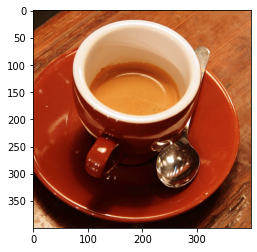

In [ ]:
img_2=img_2_2[:, 100:500,:] #cortamos de forma que el cafe quede centrado, ya tiene 400 filas (ver shape de coffee)
plt.imshow(img_2)

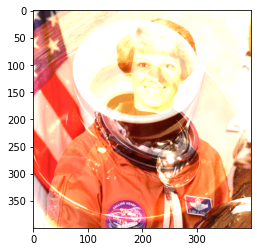

In [ ]:
img_suma= img_1 +img_2
plt.imshow(img_suma)
#sobresaturacion

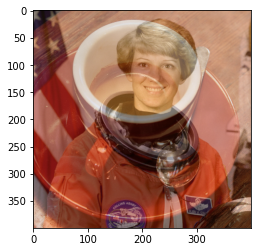

In [ ]:
img_suma_prom= (img_1 +img_2)/2
plt.imshow(img_suma_prom)
#combinacion mas intuitiva de dos imagenes en RGB

Comput

In [ ]:
v_1=extraer_v(img_1)

In [ ]:
v_2=extraer_v(img_2)

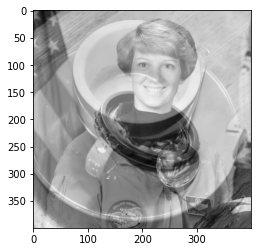

In [ ]:
v1 = extraer_v(img_1)
v2 = extraer_v(img_2)

v_suma = (v1 + v2) / 2

plt.imshow(v_suma, 'gray')

Convoluciones

In [ ]:
#asumimos que el kernel es de 3*3
#queda como ejercicio generalizar
def convolucion(img, k):
    O=np.zeros(img.shape)
    filas=O.shape[0]
    columnas=O.shape[1]

    for i in range(1, filas-1):
      for j in range(1, columnas-1):
        total=0

        total+= k[0,0] * img[i-1,j-1]
        total+= k[0,1] * img[i-1,j]
        total+= k[0,2] * img[i-1,j+1]

        total+= k[1,0] * img[i,j-1]
        total+= k[1,1] * img[i,j]
        total+= k[1,2] * img[i,j+1]

        total+= k[2,0] * img[i+1,j-1]
        total+= k[2,1] * img[i+1,j]
        total+= k[2,2] * img[i+1,j+1]

        O[i,j]=total
    
    return O


In [ ]:
img= imageio.imread('imageio:astronaut.png')/255
v=extraer_v(img)

#kernel=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]) #promedio

salida=convolucion(v,kernel)



In [ ]:
kernel = np.array([
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]
          ])

In [ ]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

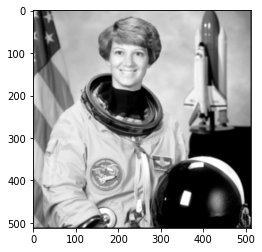

In [ ]:
plt.imshow(salida, 'gray')

In [ ]:
# # ASUMIMOS un kernel de 3x3
# # Queda como ejercicio generalizar
# def convolucion3x3(img, k):
#   o = np.zeros(img.shape)
#   filas = o.shape[0]
#   cols = o.shape[1]

#   for i in range(1, filas-1):
#     for j in range(1, cols-1):
#       total = 0
#       total += k[0,0] * img[i-1, j-1]
#       total += k[0,1] * img[i-1, j]
#       total += k[0,2] * img[i-1, j+1]

#       total += k[1,0] * img[i, j-1]
#       total += k[1,1] * img[i, j]
#       total += k[1,2] * img[i, j+1]

#       total += k[2,0] * img[i+1, j-1]
#       total += k[2,1] * img[i+1, j]
#       total += k[2,2] * img[i+1, j+1]

#       o[i, j] = total

#   return o